In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, 
their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#### Roll dice

In [15]:
def roll_dice(n_dice, n_trials):
    results = []
    for i in range(n_dice):
        results.append(np.random.randint(low = 1, high = 7, size=n_trials, dtype=int))
    
    return list(sum(results))

n_dice = 1
n_trials = 10000
population = roll_dice(n_dice, n_trials)

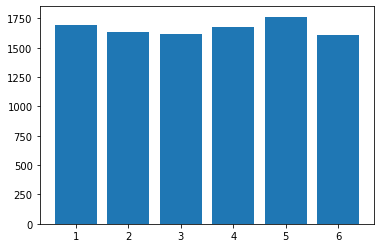

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = list(set(population))
y = [population.count(i) for i in x]
plt.bar(x, y)
#plt.title(f'Rolling {n_dice} dice {n_trials} times:\nfrequency by outcome value')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=n_dice//6+1)) # to prevent x label overlapping
plt.show()

#### Testing central limit theorem

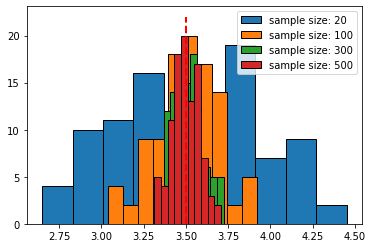

In [17]:
def get_sample(population, sample_size):
    return list(np.random.choice(population, sample_size))

n_samples = 100
sample_size_list = [20, 100, 300, 500]

mean_standard_errors = []
for sample_size in sample_size_list:
    means = []
    for i in range(n_samples):
        sample = get_sample(population, sample_size)
        sample_mean = np.mean(sample)
        
        means.append(sample_mean)

    mean_standard_errors.append(np.std(means))
    # print(np.std(means))
    plt.hist(means, label = 'sample size: {}'.format(sample_size), edgecolor='black')

plt.vlines(x=[np.mean(population)], ymin=0, ymax=22, colors='red', ls='--', lw=2)
plt.legend()
plt.show()


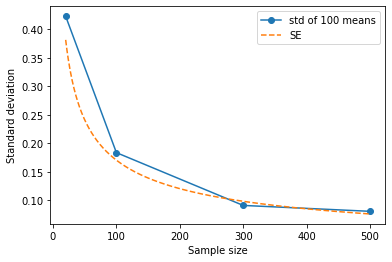

In [18]:
plt.plot(sample_size_list, mean_standard_errors, '-o', label=f'std of {n_samples} means')
x_range = np.arange(np.min(sample_size_list), np.max(sample_size_list), 1)
plt.plot(x_range, np.std(population)/np.sqrt(x_range), '--', label=f'SE')
plt.xlabel('Sample size')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()